## AutoEncode 노이즈 제거
---
 - 데이터에 노이즈 제거 활용
 - 데이터에서 주요 특징만 추출 압축하기 때문에 노이즈는 주요 특징에서 제거
 - 압축된 주요 특징으로 데이터 복원 -> 노이즈 제거

#### 데이터셋에 노이즈 추가
#### np.random.normal(loc=0.0, scale=1.0, size=None)
 - x_train_noised=x_train + np.random.normal(0, 0.5, size=x_train.shape)
 - x_test_noised=x_test + np.random.normal(0, 0.5, size=x_test.shape)

#### nc.clip(array, min, max)
 - x_train_noised=nc.clip(x_train_noised, a_min=0, a_max=1)
 - x_test_noised=nc.clip(x_train_noised, a_min=0, a_max=1)



In [2]:
from keras.datasets.mnist import load_data
from keras.utils import set_random_seed, plot_model
from keras import Sequential
from keras.layers import Dense

import numpy as np
import matplotlib.pyplot as plt

In [3]:
set_random_seed(11)

In [4]:
# 학습용 : 테스트용 = 8 : 2
(x_train, y_train), (x_test, y_test) = load_data()

In [5]:
# 스케일링
x_train=x_train/255.0
x_test=x_test/255.0

# reshape
x_train=x_train.reshape(-1,784)
x_test=x_test.reshape(-1, 784)

In [6]:
# 노이즈 추가
x_train_noised=x_train + np.random.normal(0, 0.5, size=x_train.shape)
x_test_noised=x_test + np.random.normal(0, 0.5, size=x_test.shape)

x_train_noised=np.clip(x_train_noised, a_min=0, a_max=1)
x_test_noised=np.clip(x_test_noised, a_min=0, a_max=1)


In [8]:
x_train_noised.shape

(60000, 784)

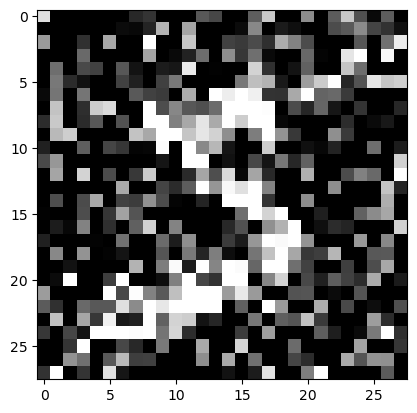

In [144]:
plt.imshow(x_train_noised[0].reshape(28,28), cmap='gray')
plt.show()

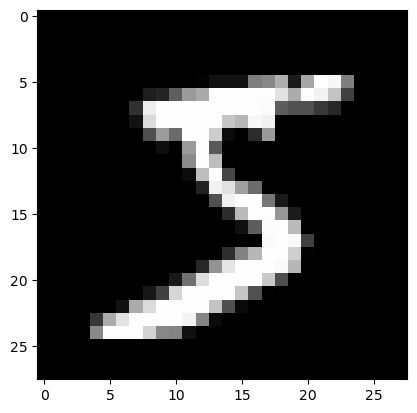

In [145]:
plt.imshow(x_train[0].reshape(28,28), cmap='gray')
plt.show()

In [146]:
def createModel(n_node):
    model=Sequential()
    model.add(Dense(units=n_node, activation='relu', input_shape=(784,)))
    model.add(Dense(784, activation='sigmoid'))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

def node_model(n_node):
    model=createModel(n_node)
    model.fit(x_train_noised, x_train, epochs=10, verbose=False)
    pre_out=model.predict(x_test_noised[:1])
    plt.imshow(pre_out.reshape(28,28), cmap='gray')
    plt.show()

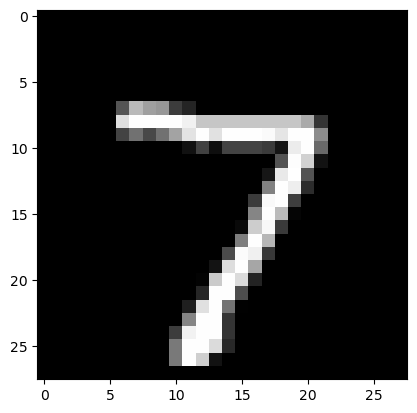

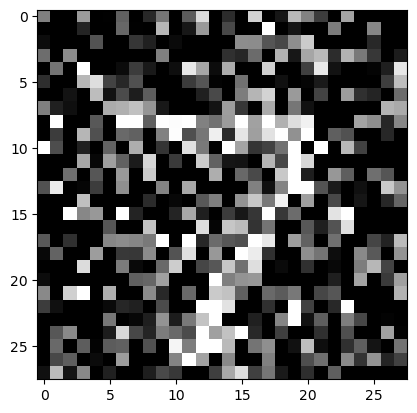

In [147]:
plt.imshow(x_test[0].reshape(28,28), cmap='gray')
plt.show()

plt.imshow(x_test_noised[0].reshape(28,28), cmap='gray')
plt.show()

1/1 [==============================] - 0s 62ms/step


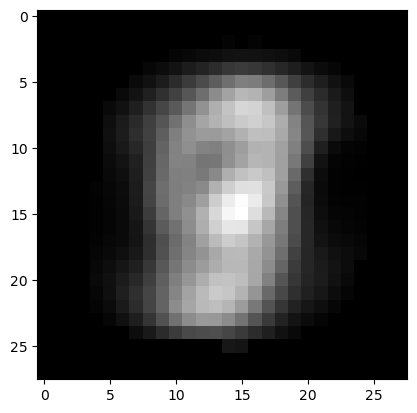

In [148]:
# 메모리 에러남
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

node_model(1)

1/1 [==============================] - 0s 86ms/step


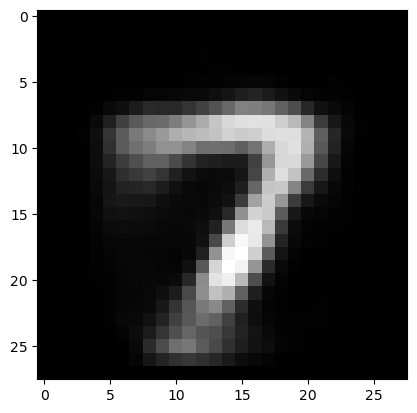

In [149]:
node_model(10)

1/1 [==============================] - 0s 89ms/step


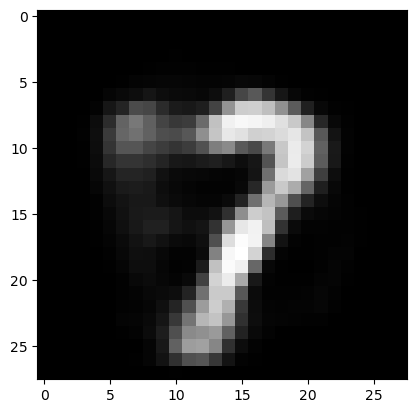

In [150]:
node_model(15)

In [151]:
# node_model(30)

In [152]:
# node_model(50)

In [153]:
# node_model(100)

In [154]:
# node_model(500)

In [9]:
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Dropout

In [10]:
def createAEModel(n_node):
    
    model=Sequential()
    # 입력
    model.add(Conv2D(n_node, kernel_size=3, padding='same', input_shape=(28,28,1)))
    
    # 출력
    model.add(Conv2D(1,kernel_size=3, padding='same', activation='sigmoid'))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model



In [11]:
x_train=x_train.reshape(-1,28,28,1)
x_train_noised=x_train_noised.reshape(-1,28,28,1)

In [12]:
model=createAEModel(10)

In [13]:
model.fit(x_train_noised, x_train, epochs=1)

1149/1875 [=================>............] - ETA: 41s - loss: 0.1195

In [ ]:
pre_out=model.predict(x_test_noised[0].reshape(-1,28,28,1))
plt.imshow(pre_out.reshape(28,28), cmap='gray')
plt.show()

1/1 [==============================] - 0s 71ms/step


In [ ]:
# def node_model2(n_node):
#     model=createAEModel(n_node)
#     model.fit(x_train_noised, x_train, epochs=11, verbose=False)
#     pre_out=model.predict(x_test_noised[0].reshape(28,28))
#     plt.imshow(pre_out.reshape(28,28), cmap='gray')
#     plt.show()

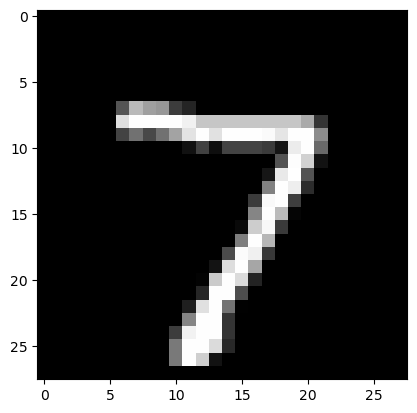

In [ ]:
plt.imshow(x_test[0].reshape(28,28), cmap='gray')
plt.show()

In [ ]:
model=createAEModel(30)
model.fit(x_train_noised, x_train, epochs=1)
pre_out=model.predict(x_test_noised[0].reshape(-1,28,28,1))
plt.imshow(pre_out.reshape(28,28), cmap='gray')
plt.show()